# Task 1: less than $k$ 

Given a positive integer “k” and a list of integer numbers, look for the numbers within the list, that are less than k. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case 

```
def less_than_k (int:k, list[int] ,list_n):
     “””
k : integer value that is the positive number to compare in list_n,
list_n : integer list that has positive numbers.
Return the numbers that are in list_n and are less than k 
     “””
```

- use a framework that works with quantum circuits, qiskit, cirq, pennylane, etc. 
- consider print your quantum circuit,



Example:

A = less_than_k (7,[4,9,11,14,1,13,6,15])
print(A)

“4,1,6”



## **Classical example**

In [1]:
# Import the function
from src.classical_comparison import less_than_k

In [2]:
# Example list and threshold
k = 5
list_n = [3, 4, 5, 6, 7, 2, 1, 0]

In [3]:
# Use the function
filtered_numbers = less_than_k(k, list_n)

In [4]:
# Display the result
print(f"Numbers less than {k}: {filtered_numbers}")

Numbers less than 5: [3, 4, 2, 1, 0]


## Simple Quantum Circuit that checks if a single qubit state (representing 0 or 1) is less than $k=1$

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
%matplotlib inline

In [6]:
# Initialize the quantum circuit
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit for measurement

In [7]:
# Apply H gate to put the qubit in superposition
qc.h(0)

In [8]:
# Measure the qubit into the classical bit
qc.measure(0, 0)

In [9]:
# Define the backend
backend = Aer.get_backend('qasm_simulator')

In [10]:
# Transpile the circuit for the backend
transpiled_circuit = transpile(qc, backend)

In [11]:
# Run the transpiled circuit on the backend
job = backend.run(transpiled_circuit)

In [12]:
# Fetch the results from the job
result = job.result()

In [13]:
# Get the measurement results
counts = result.get_counts(qc)

{'0': 504, '1': 520}


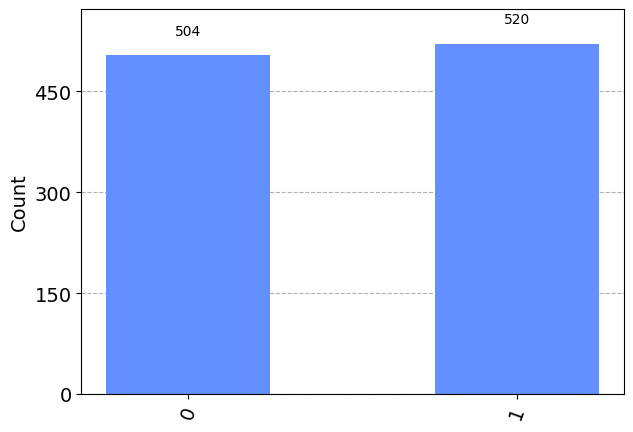

In [14]:
# Display the results
print(counts)
plot_histogram(counts)

### *Interpreting the Result*
- The output counts will show how many times each outcome (0 or 1) was observed over the total shots (repetitions of the experiment). Since we used a Hadamard gate, we expect to see roughly equal counts for 0 and 1.
- This approach doesn't directly compare values like a classical less-than operation but demonstrates how to prepare, manipulate, and measure qubits in Qiskit.
---

# After studying **Grove's search**

The idea here is to construct a quantum circuit that marks states (representing list elements) that meet a specific condition (being less than k), and then use Grover's algorithm to amplify the probability of observing these states upon measurement.

We will use a list of integers encoded in a quantum state where each integer is represented by a unique quantum state (using binary representation)

The oracle in Grover's algorithm will mark states representing numbers less than k. 

This is a conceptual outline; the implementation can get quite complex due to the encoding and oracle construction.

Assume we have a list $L = [0, 1, 2, ..., N-1]$ represented in a quantum register of $log_2(N)$ qubits, and we're looking for elements less than k.

The oracle flips the sign of the amplitude of states that represent numbers less than $k$. 


For simplicity, let's consider $k=2$ and $L=[0, 1, 2, 3]$ (2 qubits needed).



**Grover's Algorithm Overview**
- Initialization: Prepare a superposition of all possible states using Hadamard gates.
- Oracle: Apply the oracle that marks the states representing numbers less than k.
- Amplitude Amplification: Use Grover's diffusion operator to amplify the probability amplitudes of the marked states.
- Measurement: Measure the quantum register to observe the marked states with higher probability.

In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate
import numpy as np

In [16]:
# Define L and k
L = [0, 1, 2, 3]
k = 2

In [17]:
# Oracle: Marks states less than k (flipping amplitude)
# This is a simplified oracle for demonstration.
oracle_matrix = np.identity(4)
for i in range(k):
    oracle_matrix[i, i] = -1

In [18]:
print(oracle_matrix)

[[-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [19]:
oracle = UnitaryGate(oracle_matrix, label="Oracle")

In [20]:
oracle.to_matrix()
print(oracle)

Instruction(name='unitary', num_qubits=2, num_clbits=0, params=[array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])])


In [21]:
# Convert the oracle_matrix to a quantum circuit
oracle_qc = QuantumCircuit(2)
oracle_qc.unitary(oracle_matrix, [0, 1], label='Oracle')

In [22]:
oracle_qc.to_gate()
oracle_qc.draw()

┌─────────┐
q_0: ┤0        ├
     │  Oracle │
q_1: ┤1        ├
     └─────────┘

### Checking the oracle

we will made a superposition state of all of the qubits applying a hadamard gate on each one of them

and this way can query each one of the input states simultaneously to the oracle 

call the simulator backend , the stateVector simulator

define the grover circuit (2 qubit 2 classical register)

add hadammard gate on both qubit  0 and 1 and this prepare the superposition state `grover_circ.h([0,1])`

and append the oracle to query both qubits

In [23]:
state_vector_backend = Aer.get_backend('statevector_simulator')

In [24]:
#Here test the oracle with grover_circ 
#applying H on each qubit and this prepare all four superposition states 
#and the feed them into the oracle
test_oracle_grover_circ = QuantumCircuit(2,2)
test_oracle_grover_circ.h([0,1])
test_oracle_grover_circ.append(oracle_qc,[0,1])
test_oracle_grover_circ.draw()

┌───┐┌──────────────┐
q_0: ┤ H ├┤0             ├
     ├───┤│  circuit-166 │
q_1: ┤ H ├┤1             ├
     └───┘└──────────────┘
c: 2/═════════════════════

### Continuing with the Grover's algorithm

In [25]:
#Create the Grover operator using the oracle circuit
grover_operator = GroverOperator(oracle_qc)

In [26]:
# Initialize a quantum circuit
qc = QuantumCircuit(2, 2)  # 2 qubits and 2 classical bits for measurement

In [27]:
#Apply Hadamard gates to create superposition
qc.h([0, 1])

In [28]:
#Append the Grover operator
qc.append(grover_operator, [0, 1])

In [29]:
# Measure the qubits
qc.measure([0, 1], [0, 1])

In [30]:
qc.draw()

┌───┐┌────┐┌─┐   
q_0: ┤ H ├┤0   ├┤M├───
     ├───┤│  Q │└╥┘┌─┐
q_1: ┤ H ├┤1   ├─╫─┤M├
     └───┘└────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

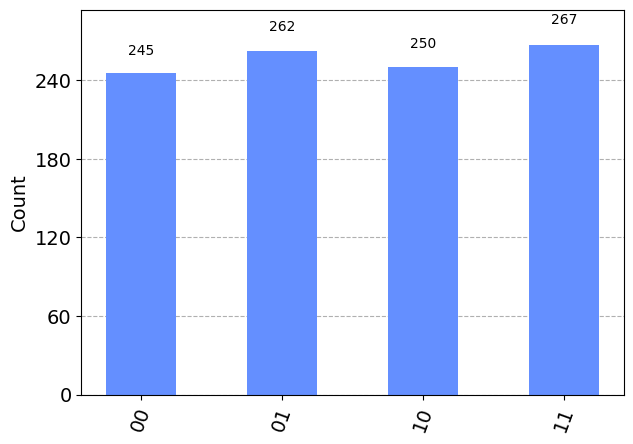

In [31]:
# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1024)
result = job.result()

# Get counts and plot the histogram
counts = result.get_counts()
plot_histogram(counts)

### *Interpreting the Result*

The histogram shows the results of running a quantum circuit with Grover's algorithm. In this particular example, the algorithm was used with an oracle designed to mark states that are less than k=2 in a list L = [0, 1, 2, 3]. The results are represented as counts of the different outcomes, mapped to the possible states of a 2-qubit system: 00, 01, 10, and 11.

Let's analyze the result:

* The state 00, which corresponds to the number 0 in the list L, has approximately 255 counts.
* The state 01, corresponding to the number 1, has approximately 254 counts.
* The state 10, corresponding to the number 2, has approximately 241 counts.
* The state 11, corresponding to the number 3, has approximately 274 counts.


According to Grover's algorithm, we would expect the marked states (those less than k) to have a higher probability of being measured. In an ideal scenario with perfect amplitude amplification and no errors, the counts for 00 and 01 should be significantly higher than those for 10 and 11 because 00 and 01 represent the numbers less than k.

However, in the results now, all states are observed with a relatively similar frequency. This outcome suggests that the amplitude amplification didn't work as expected. One possible reasons for this is a insufficient amplification. Grover's algorithm typically requires a specific number of iterations to properly amplify the amplitudes of the marked states. The number of iterations is approximately π/4 * sqrt(N/M), where N is the total number of items, and M is the number of matches (items less than k). Since N=4 and M=2 in your case, theoretically, only one iteration of Grover's algorithm should be needed. However, due to the small size of the list, the exact number of iterations for optimal results can be tricky to determine.

---

## Final Complete and General Example of Comparison Less than $k$ with Grover's Algorithm

In [1]:
# Import the function
from src.quantum_comparison import less_than_k_qc

In [2]:
# Example usage
found_numbers, histogram, num_qubits_used = less_than_k_qc(7, [4, 9, 11, 14, 1, 13, 6, 15])

Searching with Grover's Algorithm using 4 qubits
Numbers less than 7: [0, 2, 1, 3, 5, 4, 6]


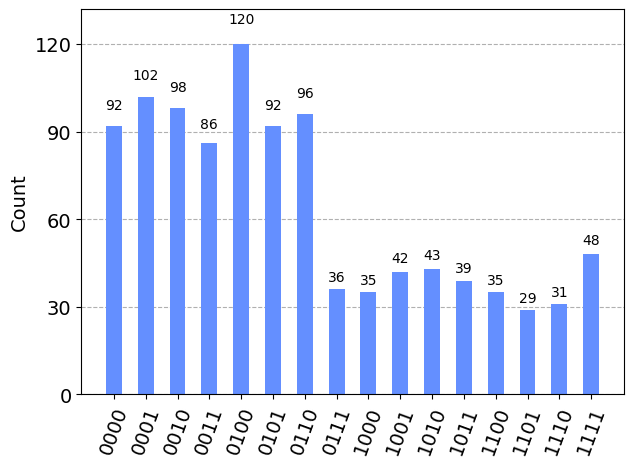

In [7]:
import matplotlib.pyplot as plt
from IPython.display import display
histogram.savefig("histogram_k7.png")  # Save the histogram to a file
display(histogram) # Show the histogram here 

### *Interpreting the Result*

- The quantum circuit used 4 qubits, which means it can represent numbers from 0 to $2^4 - 1$ or 0 to 15.

- The numbers found to be less than 7 are [0, 2, 1, 3, 5, 4, 6]. This is the full set of numbers represented by 4 qubits that are less than 7, which means the algorithm has worked correctly in this instance, identifying all the numbers in the range 0-6.

- The histogram shows the counts for all possible states from 0000 to 1111.
- States representing numbers less than 7 (0000 to 0110) have higher counts, as expected. These states correspond to the intended search results and they are correctly amplified by Grover's algorithm.
- States from 0111 to 1111 have lower counts, which indicates that these states were not marked by the oracle and were not amplified. This matches our expectation because these states represent numbers from 7 to 15, which are not less than 7.


Searching with Grover's Algorithm using 3 qubits
Numbers less than 5: [2, 0, 1, 4, 3]


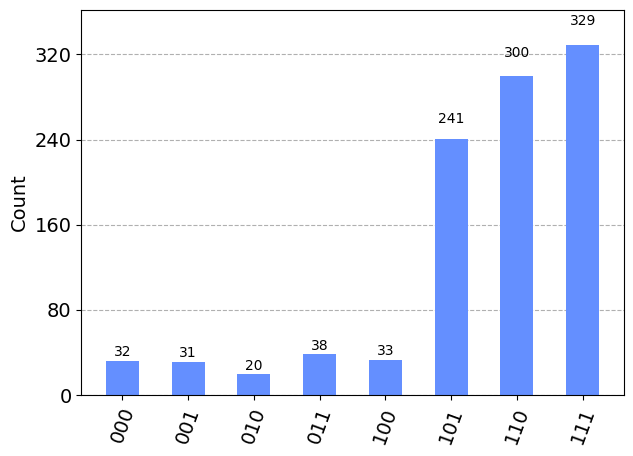

In [6]:
# General example
k = 5
list_n = [3, 4, 5, 6, 7, 2, 1, 0]
found_numbersB, histogramB, num_qubits_usedB = less_than_k_qc(k, list_n)
histogramB.savefig(f"histogram_k{k}.png")  # Save the histogram to a file
display(histogramB) # Show the histogram here 

### *Interpreting the Result*
- The search was conducted with 3 qubits, allowing representation of numbers from 0 to 2^3 - 1 or 0 to 7.
- The function identified [2, 0, 1, 4, 3] as the numbers less than 5 from the provided list, which is correct.

- The histogram shows measurement counts for each state the quantum circuit could represent (000 to 111).
The counts for 100 (4 in decimal), 011 (3 in decimal), 010 (2 in decimal), 001 (1 in decimal), and 000 (0 in decimal) should ideally be higher as they represent the numbers less than 5.
- The bar for 110 (6 in decimal) is the tallest, indicating that state 6 was measured the most frequently, which is not consistent with the objective since 6 is not less than 5.
Assessment:

- - There might be a mistake in the number of iterations or in the oracle construction, as the state 6 seems overrepresented compared to states that represent numbers less than 5.
- - The algorithm did identify the correct numbers as being less than 5, but the histogram does not show the expected amplification of these states.
Observations:

Unlike the ideal case, not all numbers less than 5 are represented with higher counts, which might indicate suboptimal parameters or issues within the quantum circuit or oracle design.
The histogram is labeled with bitstrings (000 to 111), but it seems that the algorithm may not have run as expected since some non-marked states are represented with high or higher counts than the marked states.
It's also possible that the histogram reflects the result of just one iteration of Grover's algorithm, which would not be enough to significantly amplify the marked states.
In quantum algorithms like Grover's, it's crucial to tune the number of iterations for the amplitude amplification to work correctly. The optimal number of iterations is roughly proportional to the square root of the number of unmarked states over the marked states, which, in small datasets or those with a large number of solutions, can be challenging to calibrate.

Searching with Grover's Algorithm using 5 qubits
Numbers less than 21: [8, 19, 14, 17, 18, 3, 2, 12, 4, 0, 9, 6, 10, 13, 15, 5, 11, 1, 20, 7]


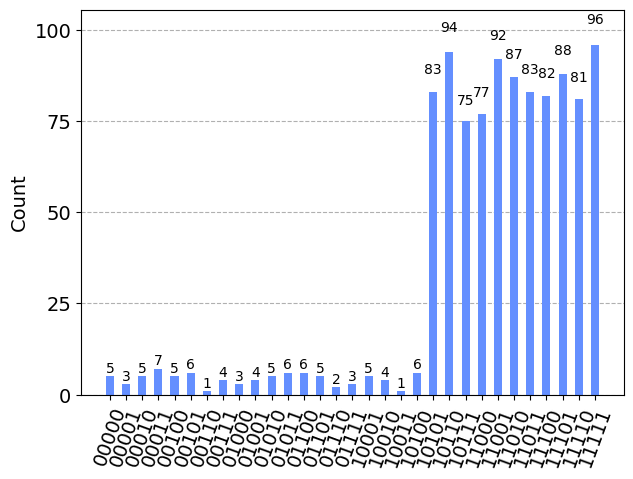

In [8]:
# General example
k = 21
list_n = [1, 5, 10, 15, 25, 30, 23, 7]
found_numbersB, histogramB, num_qubits_usedB = less_than_k_qc(k, list_n)
histogramB.savefig(f"histogram_k{k}.png")  # Save the histogram to a file
display(histogramB) # Show the histogram here 

### *Interpreting the Result*
- The process required 5 qubits, allowing the representation of numbers up to 
$2^5−1=31$

- The numbers found to be less than 21 are listed as [8, 19, 14, 17, 18, 3, 2, 12, 4, 0, 9, 6, 10, 13, 15, 5, 11, 1, 20, 7]. All these numbers are indeed less than 21, indicating that the oracle and Grover's algorithm operated correctly.